In [1]:
import os

path = os.getcwd()

print(path)

C:\Users\Michael\Documents\cs\jupyter notebooks\PS0


# Link 1 - Image Analysis

Image type:  <class 'imageio.core.util.Array'> 

Shape of the image : (1080, 1920, 3)
Image Hight 1080
Image Width 1920
Dimension of Image 3
Image size 6220800
Maximum RGB value in this image 255
Minimum RGB value in this image 0
RGB values at Row 100; Col 50
Value of only R channel 24
Value of only G channel 36
Value of only B channel 33


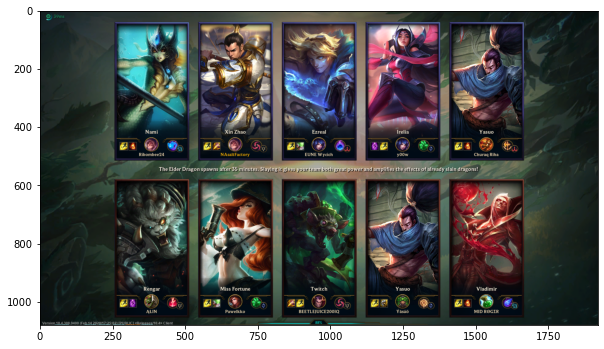

In [2]:
import imageio
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

#read the image
image = imageio.imread('sample.png')

plt.figure(figsize=(10,10))
plt.imshow(image)

#General image breakdown
print('Image type: ', type(image), '\n')
print('Shape of the image : {}'.format(image.shape))
print('Image Hight {}'.format(image.shape[0]))
print('Image Width {}'.format(image.shape[1]))
print('Dimension of Image {}'.format(image.ndim))
print('Image size {}'.format(image.size))
print('Maximum RGB value in this image {}'.format(image.max()))
print('Minimum RGB value in this image {}'.format(image.min()))
print('RGB values at Row 100; Col 50')
print('Value of only R channel {}'.format(image[ 100, 50, 0]))
print('Value of only G channel {}'.format(image[ 100, 50, 1]))
print('Value of only B channel {}'.format(image[ 100, 50, 2]))

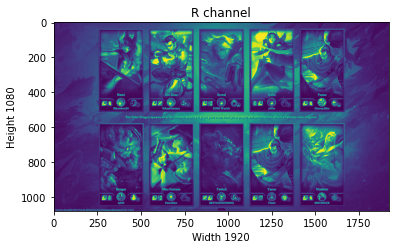

In [3]:
#Display R chanel of Image
plt.title('R channel')
plt.ylabel('Height {}'.format(image.shape[0]))
plt.xlabel('Width {}'.format(image.shape[1]))
plt.imshow(image[ : , : , 0])
plt.show()

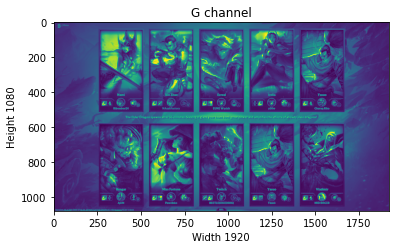

In [4]:
#Display G channel of image
plt.title('G channel')
plt.ylabel('Height {}'.format(image.shape[0]))
plt.xlabel('Width {}'.format(image.shape[1]))
plt.imshow(image[ : , : , 1])
plt.show()

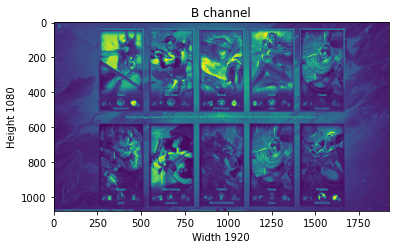

In [5]:
#Display B channel of image
plt.title('B channel')
plt.ylabel('Height {}'.format(image.shape[0]))
plt.xlabel('Width {}'.format(image.shape[1]))
plt.imshow(image[ : , : , 2])
plt.show()

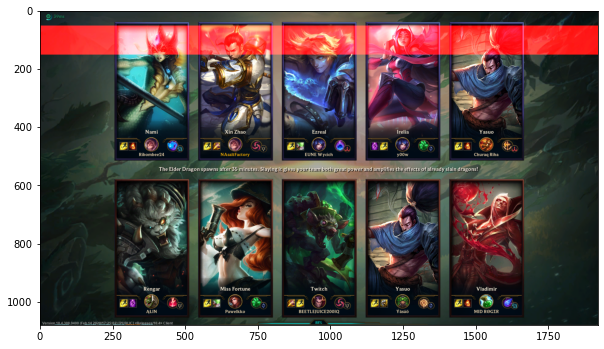

In [6]:
#set rows 50-150 Red channel to max value
image[50:150, : , 0] = 255 
plt.figure(figsize = (10,10))
plt.imshow(image)
plt.show()


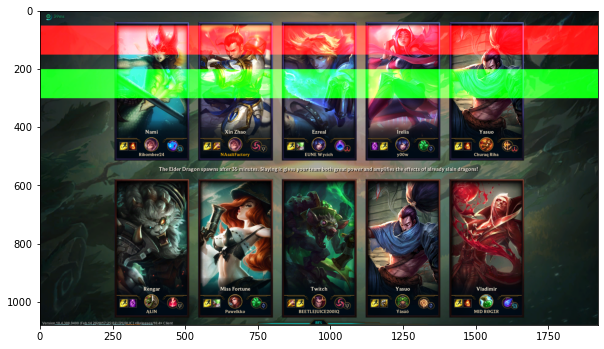

In [7]:
#Set rows 200-300 Green channel to max value
image[200:300, : , 1] = 255
plt.figure(figsize = (10,10))
plt.imshow(image)
plt.show()


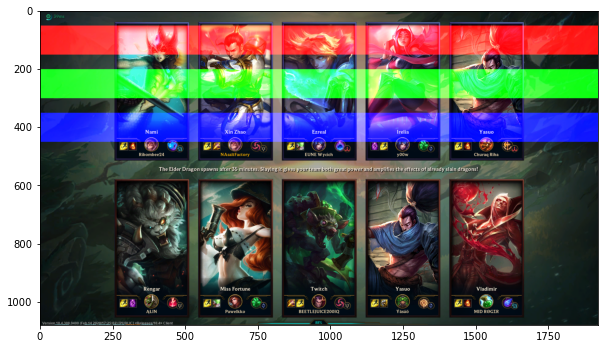

In [8]:
#Set rows 350-450 Blue channel to max value
image[350:450, : , 2] = 255
plt.figure(figsize = (10,10))
plt.imshow(image)
plt.show()


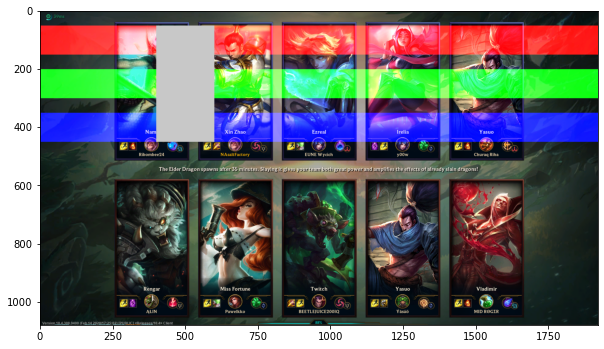

In [9]:
#Set a box bound 50-450 vertically and 400-600 horizontally to have R,G,B of 200(Grey)

image[50:450, 400:600 , [0,1,2]] = 200
plt.figure(figsize = (10,10))
plt.imshow(image)
plt.show()

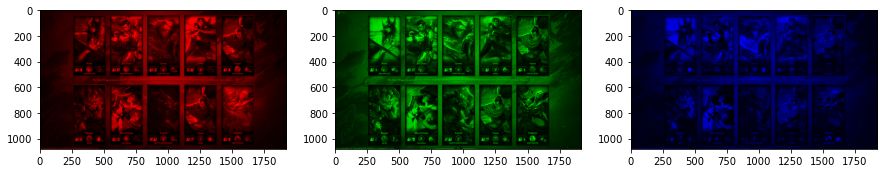

In [10]:
#re-read the image to ignore previous edits
image = imageio.imread('C:/Users/Michael/Pictures/Eldererror.png')

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,15))
for c, ax in zip(range(3), ax):
    #create a zero matrix
    splitImage = np.zeros(image.shape, dtype="uint8") #set Dtype to 8 bit unsigned (default is float64)
    splitImage[:, :, c] = image[:, :, c]
    ax.imshow(splitImage)

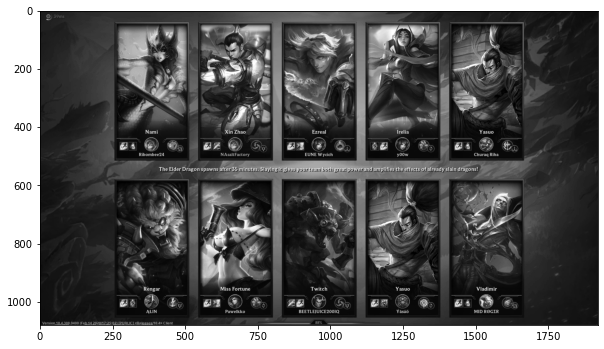

In [11]:
#takes in a standard image, lamda function to turn the image to greyscale
grayFunc = lambda rgb:np.dot(rgb[...,:3],[0.299,0.587,0.114])
grayImage = grayFunc(image) 
plt.figure(figsize=(10,10))
plt.imshow(grayImage,cmap=plt.get_cmap(name='gray'))
plt.show()

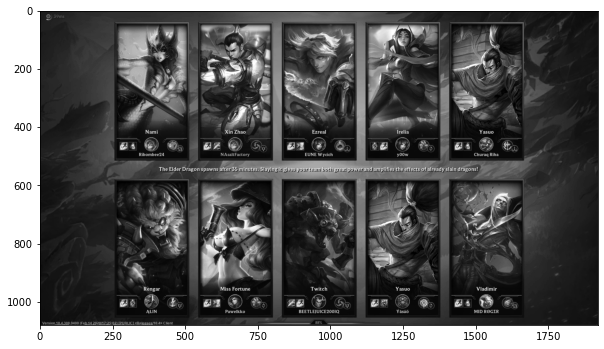

Type of the image :  <class 'imageio.core.util.Array'>
Shape of the image : (1080, 1920)
Image Hight 1080
Image Width 1920
Dimension of Image 2
Image size 2073600
Maximum RGB value in this image 255.0
Minimum RGB value in this image 0.0
Random indexes [X,Y] : 32.07


In [12]:
#takes in standard image, returns luminosity
luminosityFunc = lambda rgb:np.dot(rgb[...,:3],[0.299,0.587,0.114])
lumenImage = luminosityFunc(image) 
plt.figure(figsize=(10,10))
plt.imshow(lumenImage,cmap=plt.get_cmap(name='gray'))
plt.show()

print('Type of the image : ',type(lumenImage))
print('Shape of the image : {}'.format(lumenImage.shape))
print('Image Hight {}'.format(lumenImage.shape[0]))
print('Image Width {}'.format(lumenImage.shape[1]))
print('Dimension of Image {}'.format(lumenImage.ndim))
print('Image size {}'.format(lumenImage.size))
print('Maximum RGB value in this image {}'.format(lumenImage.max()))
print('Minimum RGB value in this image {}'.format(lumenImage.min()))
print('Random indexes [X,Y] : {}'.format(lumenImage[100,50]))

# Link 2 - Covariance and Plotting Data pt 1.

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
array = np.array([[1,3,5],[5,4,1],[3,8,6]])
np.cov(array, rowvar=False, bias=True)

array([[ 2.66666667,  0.66666667, -2.66666667],
       [ 0.66666667,  4.66666667,  2.33333333],
       [-2.66666667,  2.33333333,  4.66666667]])

In [14]:
def calculateCovariance(X):
    meanX = np.mean(X, axis = 0)
    lenX = X.shape[0]
    X = X - meanX
    return X.T.dot(X)/lenX

In [15]:
print(calculateCovariance(array))

[[ 2.66666667  0.66666667 -2.66666667]
 [ 0.66666667  4.66666667  2.33333333]
 [-2.66666667  2.33333333  4.66666667]]


In [16]:
def plotDataAndCovar(data):
    ACov = np.cov(data, rowvar=False, bias=True)
    print("Covariance Matrix:\n ", ACov)
    
    figure, ax = plt.subplots(nrows=1, ncols=2)
    figure.set_size_inches(10, 10)
    
    ax0 = plt.subplot(2, 2, 1)
    
    cmap = sns.color_palette("GnBu", 10)
    sns.heatmap(ACov, cmap=cmap, vmin=0)
    
    ax1 = plt.subplot(2, 2, 2)
    
    if data.shape[1] == 3:
        c=data[:,2]
    else:
        c="#0A98BE"
    
    ax1.scatter(data[:,0], data[:,1], c=c, s=40)
    
    ax1.spines['right'].set_visible(False)
    ax1.spines['top'].set_visible(False)

In [17]:
np.random.seed(1234)
a1 = np.random.normal(2, 1, 300)
a2 = np.random.normal(1, 1, 300)
dataArray = np.array([a1, a2]).T
dataArray.shape

(300, 2)

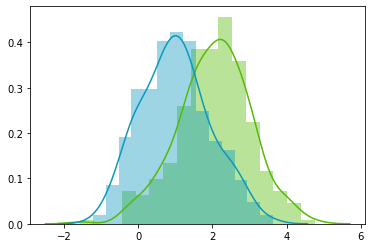

In [18]:
sns.distplot(dataArray[:,0], color="#53BB04")
sns.distplot(dataArray[:,1], color="#0A98BE")
plt.show()
plt.close()

Covariance Matrix:
  [[ 0.95171641 -0.0447816 ]
 [-0.0447816   0.87959853]]


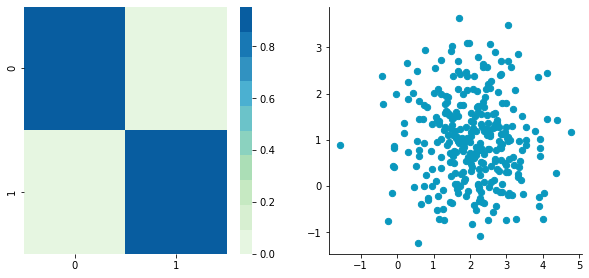

In [19]:
plotDataAndCovar(dataArray)
plt.show()
plt.close()

Covariance Matrix:
  [[0.95171641 0.92932561]
 [0.92932561 1.12683445]]


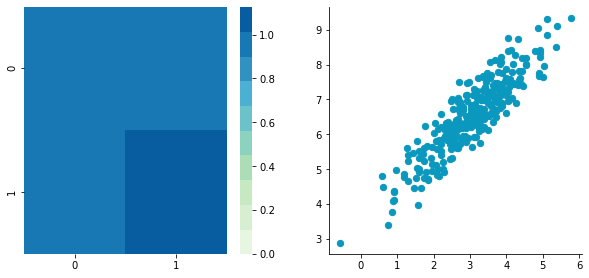

In [20]:
np.random.seed(1234)
b1 =  np.random.normal(3, 1, 300)
b2 = b1 + np.random.normal(7, 1, 300)/2.
B = np.array([b1, b2]).T
plotDataAndCovar(B)
plt.show()
plt.close()

# Link 2 - Covariance and Plotting Data pt 2.

In [21]:
def center(X):
    return X - np.mean(X, axis = 0)    

Before: 


Covariance Matrix:
  [[0.95171641 0.92932561]
 [0.92932561 1.12683445]]


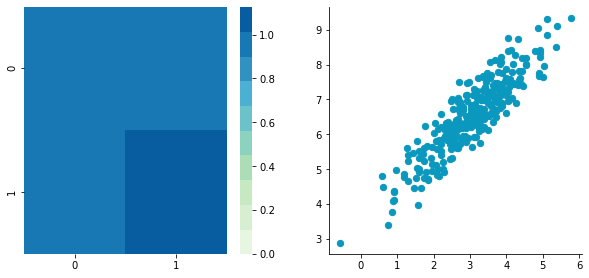

After: 


Covariance Matrix:
  [[0.95171641 0.92932561]
 [0.92932561 1.12683445]]


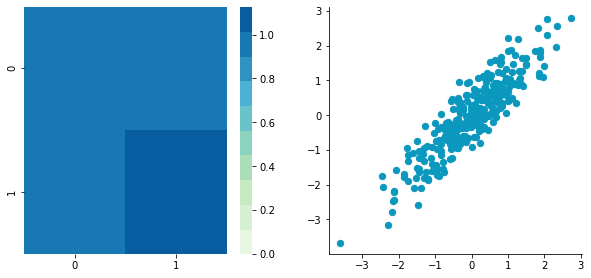

In [22]:
BCentered = center(B)

print("Before: \n\n")
plotDataAndCovar(B)
plt.show()
plt.close()


print("After: \n\n")
plotDataAndCovar(BCentered)
plt.show()
plt.close()

In [23]:
def standardize(X):
    return center(X)/np.std(X, axis=0)

Covariance Matrix:
  [[0.95171641 0.83976242]
 [0.83976242 6.22529922]]


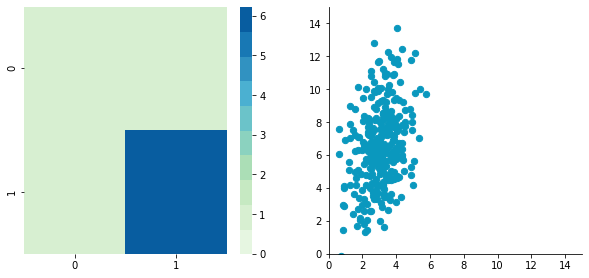

In [24]:
np.random.seed(1234)
c1 = np.random.normal(3, 1, 300)
c2 = c1 + np.random.normal(7, 5, 300)/2
C = np.array([c1, c2]).T

plotDataAndCovar(C)
plt.xlim(0, 15)
plt.ylim(0, 15)
plt.show()
plt.close()

Covariance Matrix:
  [[1.         0.34500274]
 [0.34500274 1.        ]]


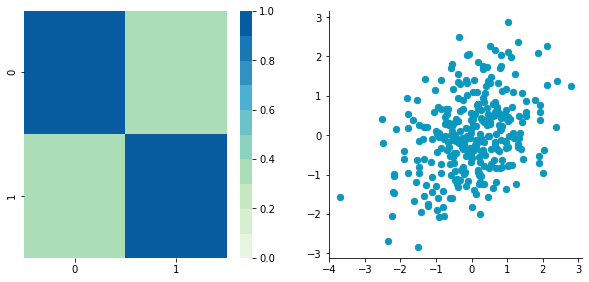

In [25]:
CStandardized = standardize(C)

plotDataAndCovar(CStandardized)
plt.show()
plt.close()

Covariance Matrix:
  [[0.95171641 0.83976242]
 [0.83976242 6.22529922]]


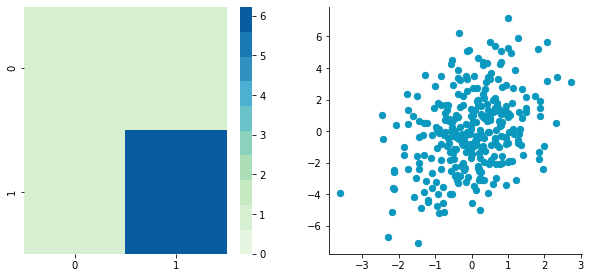

In [26]:
CCentered = center(C)

plotDataAndCovar(CCentered)
plt.show()
plt.close()

In [27]:
def decorrelate(X):
    newX = center(X)
    cov = X.T.dot(X)/float(X.shape[0])
    # Calculate the eigenvalues and eigenvectors of the covariance matrix
    eigVals, eigVecs = np.linalg.eig(cov)
    # Apply the eigenvectors to X
    decorrelated = X.dot(eigVecs)
    return decorrelated

Covariance Matrix:
  [[0.95171641 0.83976242]
 [0.83976242 6.22529922]]


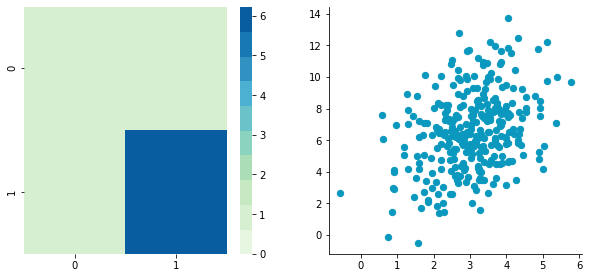

Covariance Matrix:
  [[8.21222171e-01 8.28966525e-17]
 [8.28966525e-17 6.35579346e+00]]


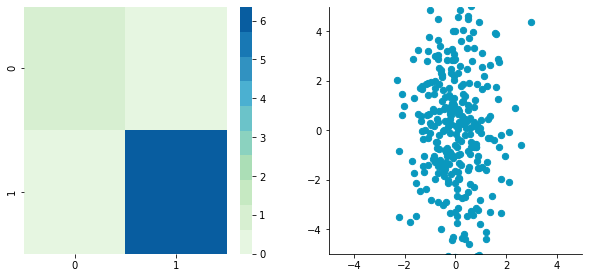

In [28]:
plotDataAndCovar(C)
plt.show()
plt.close()

CDecorrelated = decorrelate(CCentered)
plotDataAndCovar(CDecorrelated)
plt.xlim(-5,5)
plt.ylim(-5,5)
plt.show()
plt.close()

In [29]:
def whiten(X):
    newX = center(X)
    cov = X.T.dot(X)/float(X.shape[0])

    eigVals, eigVecs = np.linalg.eig(cov)

    decorrelated = X.dot(eigVecs)
    
    whitened = decorrelated / np.sqrt(eigVals + 1e-5)
    return whitened

Covariance Matrix:
  [[9.99987823e-01 2.51650552e-17]
 [2.51650552e-17 9.99998427e-01]]


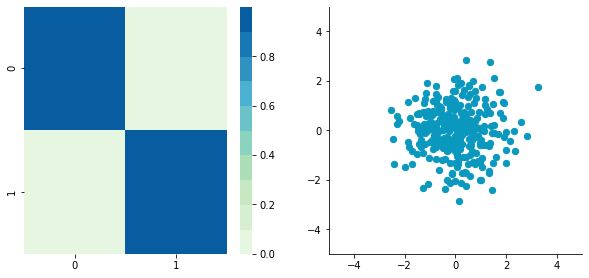

In [30]:
CWhitened = whiten(CCentered)

plotDataAndCovar(CWhitened)
plt.xlim(-5,5)
plt.ylim(-5,5)
plt.show()
plt.close()

# Link 2 - Covariance and Plotting Data pt 3.

In [31]:
from keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

X_train.shape

(50000, 32, 32, 3)

In [32]:
X = X_train[:1000]
X = X.reshape(X.shape[0], X.shape[1]*X.shape[2]*X.shape[3])
print (X.shape)

(1000, 3072)


In [33]:
def plotImage(X):
    plt.figure(figsize=(1.5, 1.5))
    plt.imshow(X.reshape(32,32,3))
    plt.show()
    plt.close()

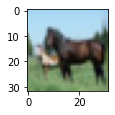

In [34]:
plotImage(X[12, :])

In [35]:
X_norm = X / 255.
print ('X.min()', X_norm.min())
print ('X.max()', X_norm.max())

X.min() 0.0
X.max() 1.0


In [36]:
X_norm.mean(axis=0).shape
X_norm.mean(axis=0)
X_norm = X_norm - X_norm.mean(axis=0)
X_norm.mean(axis=0)

array([-5.30575583e-16, -5.98021632e-16, -4.23439062e-16, ...,
       -1.81965554e-16, -2.49800181e-16,  3.98570066e-17])

In [37]:
cov = np.cov(X_norm, rowvar=False)
cov.shape

(3072, 3072)

In [38]:
U,S,V = np.linalg.svd(cov)

In [39]:
print (U.shape, S.shape)

(3072, 3072) (3072,)


In [40]:
print (np.diag(S))
print ('\nshape:', np.diag(S).shape)

[[5.46967832e+01 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 2.02861434e+01 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 1.24476904e+01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 5.20778268e-15
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  3.21171593e-15 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 1.53626844e-15]]

shape: (3072, 3072)


In [41]:
epsilon = 0.1
X_ZCA = U.dot(np.diag(1.0/np.sqrt(S + epsilon))).dot(U.T).dot(X_norm.T).T
X_ZCA_rescaled = (X_ZCA - X_ZCA.min()) / (X_ZCA.max() - X_ZCA.min())
print ('min:', X_ZCA_rescaled.min())
print ('max:', X_ZCA_rescaled.max())

min: 0.0
max: 1.0


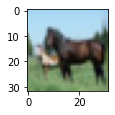

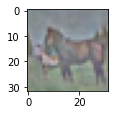

In [42]:
plotImage(X[12, :])
plotImage(X_ZCA_rescaled[12, :])

# Make Your Own NN Part 2 and 3

In [59]:
#package imports
import numpy
import scipy.special
import scipy.ndimage
import imageio
import matplotlib.pyplot
%matplotlib inline

In [60]:
class neuralNetwork:
    
    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):
        # set number of nodes in each input, hidden, output layer
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes
        
       
        self.wih = numpy.random.normal(0.0, pow(self.inodes, -0.5), (self.hnodes, self.inodes))
        self.who = numpy.random.normal(0.0, pow(self.hnodes, -0.5), (self.onodes, self.hnodes))

        self.lr = learningrate
        
        self.activation_function = lambda x: scipy.special.expit(x)
        self.inverse_activation_function = lambda x: scipy.special.logit(x)
        
        pass

    
    # train the neural network
    def train(self, inputs_list, targets_list):
        # convert inputs list to 2d array
        inputs = numpy.array(inputs_list, ndmin=2).T
        targets = numpy.array(targets_list, ndmin=2).T
        
        # calculate signals into hidden layer
        hidden_inputs = numpy.dot(self.wih, inputs)
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # calculate signals into final output layer
        final_inputs = numpy.dot(self.who, hidden_outputs)
        # calculate the signals emerging from final output layer
        final_outputs = self.activation_function(final_inputs)
        
        #calculate the error of each layer
        output_errors = targets - final_outputs
        hidden_errors = numpy.dot(self.who.T, output_errors) 
        
        # update the weights for the links between the hidden and output layers
        self.who += self.lr * numpy.dot((output_errors * final_outputs * (1.0 - final_outputs)), numpy.transpose(hidden_outputs))
        
        # update the weights for the links between the input and hidden layers
        self.wih += self.lr * numpy.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)), numpy.transpose(inputs))
        
        pass

    
    # query the neural network
    def query(self, inputs_list):
        inputs = numpy.array(inputs_list, ndmin=2).T
        
        hidden_inputs = numpy.dot(self.wih, inputs)
        hidden_outputs = self.activation_function(hidden_inputs)
        
        final_inputs = numpy.dot(self.who, hidden_outputs)
        final_outputs = self.activation_function(final_inputs)
        
        return final_outputs
    
     
    # backquery the neural network (provide label and attempt to get imput data)
    def backquery(self, targets_list):
        final_outputs = numpy.array(targets_list, ndmin=2).T
        
        final_inputs = self.inverse_activation_function(final_outputs)
        hidden_outputs = numpy.dot(self.who.T, final_inputs)
        hidden_outputs -= numpy.min(hidden_outputs)
        hidden_outputs /= numpy.max(hidden_outputs)
        hidden_outputs *= 0.98
        hidden_outputs += 0.01
        
        hidden_inputs = self.inverse_activation_function(hidden_outputs)     
        inputs = numpy.dot(self.wih.T, hidden_inputs)
        inputs -= numpy.min(inputs)
        inputs /= numpy.max(inputs)
        inputs *= 0.98
        inputs += 0.01
        
        return inputs

In [61]:
input_nodes = 784
hidden_nodes = 200
output_nodes = 10

learning_rate = 0.1

n = neuralNetwork(input_nodes,hidden_nodes,output_nodes, learning_rate)

In [62]:
# load the mnist training data CSV file into a list
training_data_file = open("mnist_dataset/mnist_train.csv", 'r')
training_data_list = training_data_file.readlines()
training_data_file.close()

In [63]:
epochs = 5
print("Starting epoc 0")
for e in range(epochs):
    # go through all records in the training data set
    for index, record in enumerate(training_data_list):
        # split the record by the ',' commas
        all_values = record.split(',')
        # scale and shift the inputs
        inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
        # make targets
        targets = numpy.zeros(output_nodes) + 0.01
        targets[int(all_values[0])] = 0.99
        n.train(inputs, targets)
        
        ## create rotated variations
        # rotated anticlockwise by x degrees
        inputs_plusx_img = scipy.ndimage.interpolation.rotate(inputs.reshape(28,28), 10, cval=0.01, order=1, reshape=False)
        n.train(inputs_plusx_img.reshape(784), targets)
        # rotated clockwise by x degrees
        inputs_minusx_img = scipy.ndimage.interpolation.rotate(inputs.reshape(28,28), -10, cval=0.01, order=1, reshape=False)
        n.train(inputs_minusx_img.reshape(784), targets)
               
        if (index % 20000 == 0):
            print("  " + str(index) + " elements trained")
    print("Completed epoc " + str(e))
    print("Starting epoc " + str(e+1))
    pass

Starting epoc 0
  0 elements trained
  20000 elements trained
  40000 elements trained
Completed epoc 0
Starting epoc 1
  0 elements trained
  20000 elements trained
  40000 elements trained
Completed epoc 1
Starting epoc 2
  0 elements trained
  20000 elements trained
  40000 elements trained
Completed epoc 2
Starting epoc 3
  0 elements trained
  20000 elements trained
  40000 elements trained
Completed epoc 3
Starting epoc 4
  0 elements trained
  20000 elements trained
  40000 elements trained
Completed epoc 4
Starting epoc 5


In [64]:
#load testing data
test_data_file = open("mnist_dataset/mnist_test.csv", 'r')
test_data_list = test_data_file.readlines()
test_data_file.close()

In [65]:
scorecard = []

# go through all the records in the test data set
for record in test_data_list:
    all_values = record.split(',')
    correct_label = int(all_values[0])
 
    inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
    outputs = n.query(inputs)
    
    label = numpy.argmax(outputs)
    if (label == correct_label):
        scorecard.append(1)
    else:
        scorecard.append(0)
        pass
    
    pass

In [66]:
# calculate the performance score, the fraction of correct answers
scorecard_array = numpy.asarray(scorecard)
print ("performance = ", scorecard_array.sum() / scorecard_array.size * 100, "%")

performance =  97.0 %


5
Given input of 5 estimated value of 5


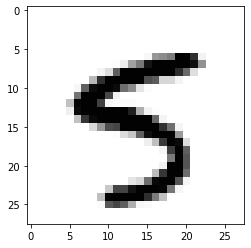

In [67]:
dataPoint = test_data_list[1221].split(',')
print(dataPoint[0])
image_array = numpy.asfarray(dataPoint[1:]).reshape((28,28))
matplotlib.pyplot.imshow(image_array, cmap='Greys', interpolation='None')
inputs = (numpy.asfarray(dataPoint[1:]) / 255.0 * 0.99) + 0.01
answer = n.query(inputs)
print("Given input of " + str(dataPoint[0]) + " estimated value of " + str(numpy.argmax(answer)))

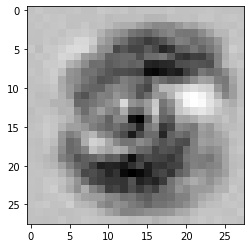

In [76]:
generateNumber = 5
targets = numpy.zeros(output_nodes) + 0.01
targets[generateNumber] = 0.99

image_data = n.backquery(targets)
matplotlib.pyplot.imshow(image_data.reshape(28,28), cmap='Greys', interpolation='None')